## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    
    out = keras.layers.Dense(units=10,activation="softmax")(x)

    
    model = keras.models.Model(inputs=[input_layer],outputs = [out])
    return model


In [5]:
model = build_mlp()

# 用 Keras 內建方法檢視模型各層參數量
model.summary()

"""
Compile 模型
"""
sgd = keras.optimizers.SGD(lr=0.001)


model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer=sgd)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test),
          shuffle=True) 

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 93us/step - loss: 2.2532 - acc: 0.1755 - val_loss: 2.1954 - val_acc: 0.2252
Epoch 2/500
50000/50000 [==============================] - 3s 51us/step - loss: 2.1597 - acc: 0.2386 - val_loss: 2.1247 - val_acc: 0.2600
Epoch 3/500
50000/50000 [==============================] - 3s 50us/step - loss: 2.0996 - acc: 0.2644 - val_loss: 2.0750 - val_acc: 0.2722
Epoch 4/500
50000/50000 [==============================] - 3s 51us/step - loss: 2.0547 - acc: 0.2800 - val_loss: 2.0352 - val_acc: 0.2880
Epoch 5/500
50000/50000 [==============================] - 3s 52us/step - loss: 2.0184 - acc: 0.2921 - val_loss: 2.0029 - val_acc: 0.2971
Epoch 6/500
50000/50000 [==============================] - 3s 52us/step - loss: 1.9883 - acc: 0.3022 - val_loss: 1.9764 - val_acc: 0.3080
Epoch 7/500
50000/50000 [==============================] - 3s 52us/step - loss: 1.9630 - acc: 0.3119 - val_loss: 1.9530 - 

50000/50000 [==============================] - 3s 51us/step - loss: 1.6375 - acc: 0.4304 - val_loss: 1.6442 - val_acc: 0.4243
Epoch 60/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.6340 - acc: 0.4311 - val_loss: 1.6429 - val_acc: 0.4214
Epoch 61/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.6315 - acc: 0.4324 - val_loss: 1.6379 - val_acc: 0.4281
Epoch 62/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.6284 - acc: 0.4343 - val_loss: 1.6371 - val_acc: 0.4297
Epoch 63/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.6253 - acc: 0.4354 - val_loss: 1.6339 - val_acc: 0.4333
Epoch 64/500
50000/50000 [==============================] - 3s 52us/step - loss: 1.6223 - acc: 0.4355 - val_loss: 1.6318 - val_acc: 0.4293
Epoch 65/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.6197 - acc: 0.4364 - val_loss: 1.6272 - val_acc: 0.4324
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.5010 - acc: 0.4770 - val_loss: 1.5347 - val_acc: 0.4575
Epoch 119/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.4993 - acc: 0.4789 - val_loss: 1.5292 - val_acc: 0.4600
Epoch 120/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.4976 - acc: 0.4805 - val_loss: 1.5265 - val_acc: 0.4640
Epoch 121/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.4956 - acc: 0.4809 - val_loss: 1.5261 - val_acc: 0.4633
Epoch 122/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.4938 - acc: 0.4807 - val_loss: 1.5250 - val_acc: 0.4630
Epoch 123/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.4920 - acc: 0.4815 - val_loss: 1.5253 - val_acc: 0.4633
Epoch 124/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.4906 - acc: 0.4829 - val_loss: 1.5322 - val_acc: 0.4632
Epoch 125/500
50000/

50000/50000 [==============================] - 3s 51us/step - loss: 1.4086 - acc: 0.5103 - val_loss: 1.4654 - val_acc: 0.4785
Epoch 177/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.4070 - acc: 0.5098 - val_loss: 1.4655 - val_acc: 0.4808
Epoch 178/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.4054 - acc: 0.5112 - val_loss: 1.4605 - val_acc: 0.4800
Epoch 179/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.4046 - acc: 0.5120 - val_loss: 1.4677 - val_acc: 0.4824
Epoch 180/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.4031 - acc: 0.5114 - val_loss: 1.4651 - val_acc: 0.4839
Epoch 181/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.4011 - acc: 0.5129 - val_loss: 1.4664 - val_acc: 0.4764
Epoch 182/500
50000/50000 [==============================] - 3s 52us/step - loss: 1.4009 - acc: 0.5131 - val_loss: 1.4600 - val_acc: 0.4801
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 3s 51us/step - loss: 1.3293 - acc: 0.5383 - val_loss: 1.4188 - val_acc: 0.4945
Epoch 235/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.3287 - acc: 0.5381 - val_loss: 1.4157 - val_acc: 0.4970
Epoch 236/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.3270 - acc: 0.5370 - val_loss: 1.4154 - val_acc: 0.4969
Epoch 237/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.3253 - acc: 0.5388 - val_loss: 1.4187 - val_acc: 0.4955
Epoch 238/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.3241 - acc: 0.5385 - val_loss: 1.4135 - val_acc: 0.4967
Epoch 239/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.3231 - acc: 0.5401 - val_loss: 1.4329 - val_acc: 0.4922
Epoch 240/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.3214 - acc: 0.5403 - val_loss: 1.4221 - val_acc: 0.4970
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 3s 51us/step - loss: 1.2590 - acc: 0.5621 - val_loss: 1.3838 - val_acc: 0.5087
Epoch 293/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.2573 - acc: 0.5620 - val_loss: 1.3799 - val_acc: 0.5104
Epoch 294/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.2563 - acc: 0.5635 - val_loss: 1.3821 - val_acc: 0.5113
Epoch 295/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.2554 - acc: 0.5628 - val_loss: 1.3875 - val_acc: 0.5073
Epoch 296/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.2542 - acc: 0.5650 - val_loss: 1.3843 - val_acc: 0.5099
Epoch 297/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.2527 - acc: 0.5647 - val_loss: 1.3781 - val_acc: 0.5118
Epoch 298/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.2509 - acc: 0.5652 - val_loss: 1.3855 - val_acc: 0.5103
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 3s 51us/step - loss: 1.1952 - acc: 0.5830 - val_loss: 1.3950 - val_acc: 0.5027
Epoch 351/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.1939 - acc: 0.5844 - val_loss: 1.3734 - val_acc: 0.5118
Epoch 352/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.1917 - acc: 0.5849 - val_loss: 1.3570 - val_acc: 0.5166
Epoch 353/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.1916 - acc: 0.5845 - val_loss: 1.3624 - val_acc: 0.5139
Epoch 354/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.1906 - acc: 0.5855 - val_loss: 1.3744 - val_acc: 0.5122
Epoch 355/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.1895 - acc: 0.5851 - val_loss: 1.3639 - val_acc: 0.5177
Epoch 356/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.1887 - acc: 0.5852 - val_loss: 1.3592 - val_acc: 0.5169
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 3s 51us/step - loss: 1.1323 - acc: 0.6071 - val_loss: 1.3520 - val_acc: 0.5213
Epoch 409/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.1318 - acc: 0.6062 - val_loss: 1.3405 - val_acc: 0.5229
Epoch 410/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.1299 - acc: 0.6069 - val_loss: 1.3689 - val_acc: 0.5184
Epoch 411/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.1300 - acc: 0.6062 - val_loss: 1.3581 - val_acc: 0.5220
Epoch 412/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.1281 - acc: 0.6069 - val_loss: 1.3508 - val_acc: 0.5168
Epoch 413/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.1275 - acc: 0.6075 - val_loss: 1.3537 - val_acc: 0.5234
Epoch 414/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.1268 - acc: 0.6056 - val_loss: 1.4071 - val_acc: 0.5023
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 3s 51us/step - loss: 1.0728 - acc: 0.6263 - val_loss: 1.3851 - val_acc: 0.5144
Epoch 467/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.0714 - acc: 0.6267 - val_loss: 1.3688 - val_acc: 0.5189
Epoch 468/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.0730 - acc: 0.6259 - val_loss: 1.3499 - val_acc: 0.5247
Epoch 469/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.0700 - acc: 0.6286 - val_loss: 1.3675 - val_acc: 0.5185
Epoch 470/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.0711 - acc: 0.6250 - val_loss: 1.3600 - val_acc: 0.5213
Epoch 471/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.0694 - acc: 0.6268 - val_loss: 1.3619 - val_acc: 0.5204
Epoch 472/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.0692 - acc: 0.6278 - val_loss: 1.3569 - val_acc: 0.5169
Epoch 473/500
50000/50000 [=======

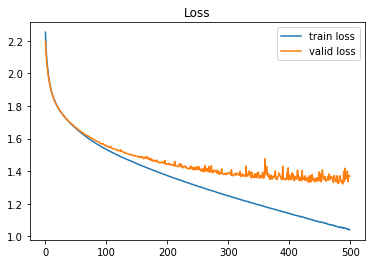

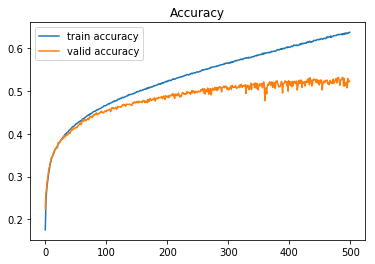

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()